In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
idx = pd.IndexSlice

In [2]:
pits = pd.read_pickle('data/96/merge_pits')
pits

Pit                          Pitstop reason Tyres condition  \
10 0   Stop 1 (Lap 3)  Tyres change due to the weather change             86%   
   1  Stop 2 (Lap 22)                   No more fuel was left             34%   
   2  Stop 3 (Lap 35)                   No more fuel was left             54%   
   3  Stop 4 (Lap 48)                   No more fuel was left             53%   
11 0   Stop 1 (Lap 3)  Tyres change due to the weather change             84%   
   1  Stop 2 (Lap 28)                   No more fuel was left             41%   
   2  Stop 3 (Lap 54)                   No more fuel was left             38%   

     Fuel left Refilled to Pit time  
10 0       49%   No refill  34.035s  
   1        2%   60 liters  21.711s  
   2        0%   60 liters  26.025s  
   3        0%   60 liters  25.337s  
11 0       37%   75 liters  36.748s  
   1        1%   75 liters  25.267s  
   2        0%   75 liters  27.122s

In [3]:
pits['Pit'] = pd.to_numeric(pits['Pit'].str.split().str[-1].str[:-1])
pits['Tyres condition'] = pd.to_numeric(pits['Tyres condition'].str[:-1])

In [4]:
pits['Delta'] = pits['Pit'].diff()
pits.loc[idx[:, 0], 'Delta'] = pits.loc[idx[:, 0], 'Pit']
pits

Pit                          Pitstop reason  Tyres condition Fuel left  \
10 0    3  Tyres change due to the weather change               86       49%   
   1   22                   No more fuel was left               34        2%   
   2   35                   No more fuel was left               54        0%   
   3   48                   No more fuel was left               53        0%   
11 0    3  Tyres change due to the weather change               84       37%   
   1   28                   No more fuel was left               41        1%   
   2   54                   No more fuel was left               38        0%   

     Refilled to Pit time  Delta  
10 0   No refill  34.035s    3.0  
   1   60 liters  21.711s   19.0  
   2   60 liters  26.025s   13.0  
   3   60 liters  25.337s   13.0  
11 0   75 liters  36.748s    3.0  
   1   75 liters  25.267s   25.0  
   2   75 liters  27.122s   26.0

<Axes: xlabel='Delta', ylabel='Tyres condition'>

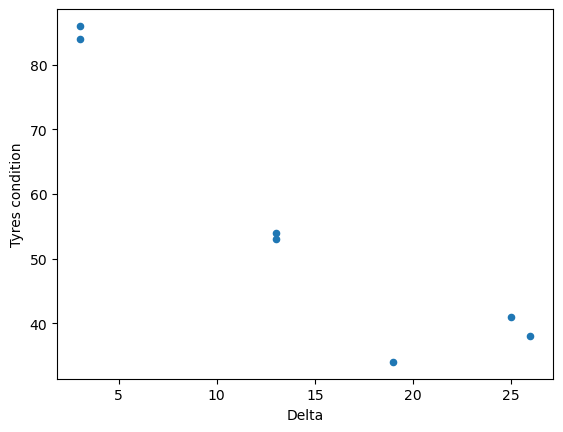

In [6]:
pits.plot(x = 'Delta', y = 'Tyres condition', kind = 'scatter')